In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans, MeanShift
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Función para cargar un fichero .npy y devolverlo como un array de numpy

In [23]:
def read_np_file(file_name):
    return np.load(file_name)

Función plot_data
Esta función recibe distintos parametros para graficar dinamicamente los 3 cuadros.

- **ax**: cuadro de matplotlib donde se va a graficar.
- **coord**: array de numpy con las coordenadas [x, y] de los puntos a graficar.
- **colors**: array con los colores para cada punto.
- **title**: título del cuadro.
- **xlabel**: etiqueta del eje x.
- **ylabel**: etiqueta del eje y.
- **labels** : default None, recibe a _.npy, un array unidimensional con las etiquetas de cada punto
- **centers**: default None, recibe un array de numpy con las coordenadas [x, y] de los centros de cada cluster.

In [24]:
def plot_data(ax, coord, colors, title, xlabel, ylabel, labels=None, centers=None):

    # Si no hay labels, se grafica todo de 
    # un solo color (celeste)
    
    if labels is None:
        ax.scatter(coord[:, 0], coord[:, 1], c=colors[0])

    # Si hay labels, se grafica cada cluster con un 
    # color distinto (rojo, verde, azul)

    else:
        ax.scatter(coord[:, 0], coord[:, 1], c=[colors[i+1] for i in labels])

    if centers is not None:
        ax.scatter(centers[:, 0], centers[:, 1], c="#000000", marker="x", s=100)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

### K-means

K-means es un algoritmo de aprendizaje no supervisado que agrupa los datos en k grupos/clusters distintos. El algoritmo funciona iterativamente asignando cada observación a uno de los k grupos basándose en las características medidas. Los puntos de datos se agrupan en un grupo tal que la suma de las distancias al cuadrado de los puntos de datos al centroide del grupo es mínima. En otras palabras, el algoritmo K-means identifica k número de centroides, y luego asigna cada observación a un clúster.

Función **Kmeans**:
- **n_clusters**: número de clusters a crear.
- **n_init**: número de veces que se ejecutará el algoritmo con distintos centroides. Al establecer el valor en "auto" se ejecuta 10 veces con distintos centroides.


Etiquetas:  [0 1 2]

Cantidad de datos:  1000

Predicciones: 

El punto  [2. 5.]  pertenece al cluster  2
El punto  [3.2 6.5]  pertenece al cluster  2
El punto  [7.  2.5]  pertenece al cluster  0
El punto  [9.  3.2]  pertenece al cluster  0
El punto  [ 9. -6.]  pertenece al cluster  1
El punto  [11. -8.]  pertenece al cluster  1


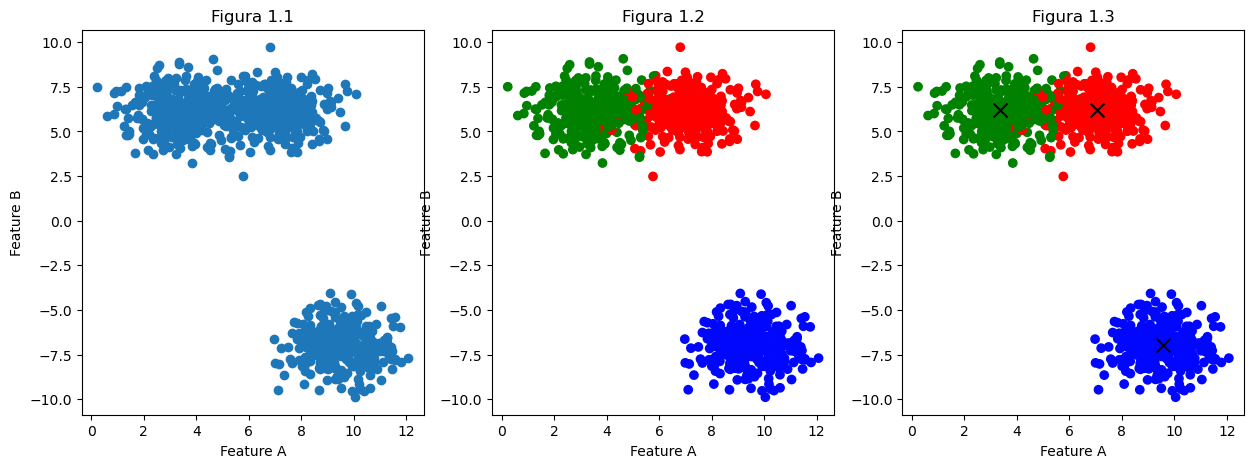

In [25]:
a = read_np_file("KMeans/A.npy")
labels = read_np_file("KMeans/_.npy")
colors = ["#1d77b9", "#fe0000", "#008100", "#0007fc"]

kmeans = KMeans(n_clusters=3, n_init="auto").fit(a)
centers = kmeans.cluster_centers_
unique_labels = kmeans.labels_
nData = len(a)

data_test = np.array([
    [2, 5], [3.2, 6.5], 
    [7, 2.5], [9, 3.2], 
    [9, -6], [11, -8]
])

prediction = kmeans.predict(data_test)

print("\nEtiquetas: ", np.unique(unique_labels))
print("\nCantidad de datos: " , nData)
print("\nPredicciones: \n")

for i in range (len(prediction)):
    print("El punto ", data_test[i], " pertenece al cluster ", prediction[i])

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

plot_data(axs[0], a, colors, "Figura 1.1", "Feature A", "Feature B")
plot_data(axs[1], a, colors, "Figura 1.2", "Feature A", "Feature B", labels=labels)
plot_data(axs[2], a, colors, "Figura 1.3", "Feature A", "Feature B", centers=centers, labels=labels)

### Mean Shift

Mean Shift es un algoritmo de agrupamiento no paramétrico que no requiere que se especifique el número de clústeres. El algoritmo comienza por asignar cada punto de datos a sí mismo. Luego, el algoritmo itera a través de cada punto de datos y lo mueve a la ubicación de un clúster vecino más cercano. Después de que se mueve un punto de datos, se recalcula el centroide de ese clúster. Este proceso continúa hasta que se alcanza la convergencia, es decir, hasta que los puntos de datos ya no se mueven de clúster a clúster.

Función **MeanShift**:
- **bandwidth**: radio de la ventana de búsqueda.


Etiquetas:  [0 1 2 3]

Cantidad de datos:  1000

Predicciones: 

El punto [-7. -6.]  pertenece al cluster  2
El punto [ 1.5 -6.5]  pertenece al cluster  3
El punto [7.9 0.5]  pertenece al cluster  1
El punto [ 5.5 10. ]  pertenece al cluster  0


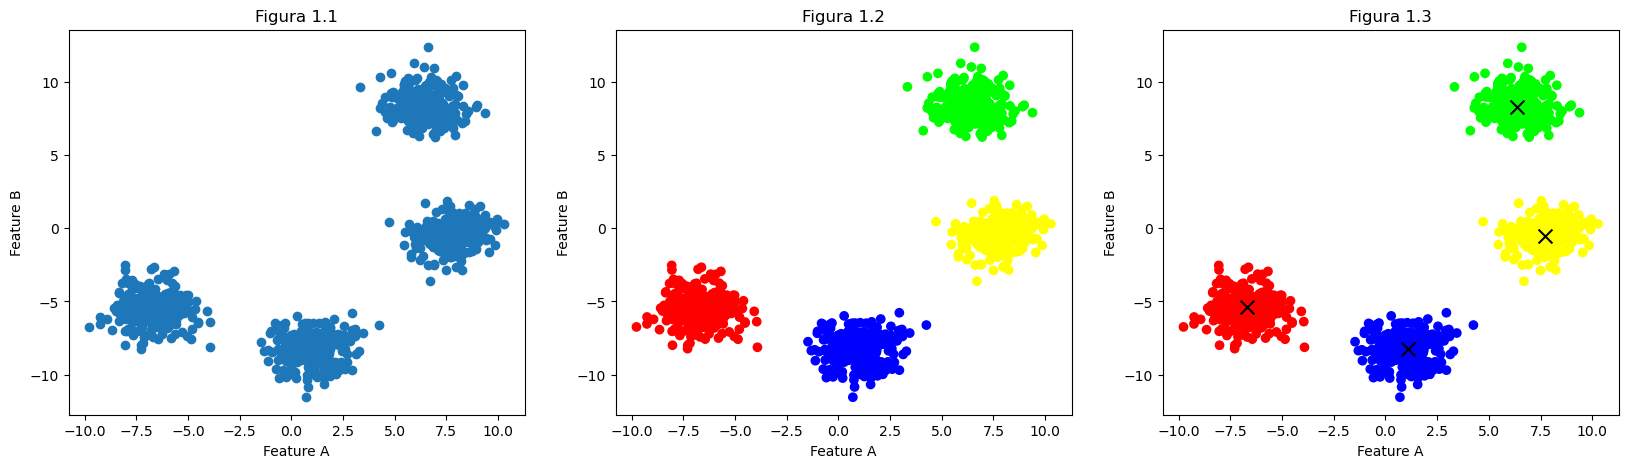

In [26]:
a = read_np_file("MeanShift/X.npy")
labels = read_np_file("MeanShift/_.npy")
colors = ["#1d77b9", "#ff0000", "#00ff00", "#0000ff", "#ffff00"]

clustering = MeanShift(bandwidth=2).fit(a)
centers = clustering.cluster_centers_

nData = len(a)

data_test = np.array([
    [-7, -6], [1.5, -6.5],
    [7.9, 0.5], [5.5, 10]
])

prediction = MeanShift.predict(clustering, data_test)

print("\nEtiquetas: ", np.unique(labels))
print("\nCantidad de datos: ", nData)
print("\nPredicciones: \n")

for i in range(len(prediction)):
    print("El punto", data_test[i], " pertenece al cluster ", prediction[i])

_, ax = plt.subplots(1, 3, figsize=(20, 5))

plot_data(ax[0], a, colors, "Figura 1.1", "Feature A", "Feature B")
plot_data(ax[1], a, colors, "Figura 1.2", "Feature A", "Feature B", labels=labels)
plot_data(ax[2], a, colors, "Figura 1.3", "Feature A", "Feature B", labels=labels, centers=centers)

plt.show()

### Regresión Lineal

La regresión lineal es un método estadístico que intenta modelar la relación entre una variable dependiente continua y una o más variables explicativas (o independientes) mediante el ajuste de una línea recta (o un plano hiperplano en general) a los datos observados. En el caso de una sola variable explicativa, la regresión lineal se denomina regresión lineal simple. Para más de una variable explicativa, el proceso se denomina regresión lineal múltiple. Este término es distinto de la regresión lineal multivariante, donde se observan múltiples variables de respuesta, en lugar de una sola variable de respuesta.


Se definen los arreglos correspondientes a los valores de las alturas y a los pesos (x, y).
La variable independiente corresponde a la altura y la variable dependiente al peso.

Formato de la variable independiente (altura): x = [x1, x2, ..., xn]
Formato de la variable dependiente (peso): y = [y1, y2, ..., yn]

In [27]:
height = np.array([[1.60], [1.65], [1.70], [1.73], [1.80]])
weight = np.array([60.0,  65.0, 72.3, 75.0, 80.0])


Se instancia la clase LinearRegression() y se ajusta el modelo con los datos de entrenamiento.  

Se asignan los valores de la predicción y se calcula usando predict().

In [28]:
reg = linear_model.LinearRegression()
reg.fit(height, weight)

predict_data = np.array([[1.58], [1.62], [1.69], [1.76], [1.82]])
predict_data = reg.predict(predict_data)

result = [round(x, 2) for x in predict_data]
print("Predicciones: ", result)

Predicciones:  [58.48, 62.61, 69.84, 77.07, 83.27]


#### Cálculo de RSS. 

Este valor representa la suma de los errores entre predicción y valores al cuadrado. Con esto se puede decir que tan bueno es el modelo.

Ejemplo:

valores reales = [1, 2, 3, 4, 5]
predicciones   = [1, 3, 3, 5, 6]

RSS = (1-1)^2 + (2-3)^2 + (3-3)^2 + (4-5)^2 + (5-6)^2 = 3

In [30]:
rss = np.sum(np.square(weight - reg.predict(height)))
print("RSS: ", rss)

RSS:  5.336432246998307


### Distancia del Coseno

La distancia del coseno es una medida de similitud entre dos vectores de un espacio, que se define como el coseno del ángulo comprendido entre ellos. Esta distancia es una medida del tamaño del ángulo entre dos vectores. Si los vectores son idénticos, la distancia del coseno será 0. Si los vectores son ortogonales, o sea que forman un ángulo de 90°, la distancia del coseno será 1. Si los vectores son opuestos, la distancia del coseno será -1.

<img src="./img/cos.png" width="900">

In [32]:
def cos_distance(A, B):
    num = np.dot(A, B)
    den = np.linalg.norm(A) * np.linalg.norm(B)

    return num / den

In [33]:

A = np.array([2, 1, 0, 2, 0, 1, 1, 1])
B = np.array([2, 1, 1, 1, 1, 0, 1, 1])

P = np.array([1, 2, 3, 0, 4, 6, 7, 9])
Q = np.array([2, 4, 3, 1, 8, 2, 4, 1])

S = np.array([2, 1, 4, 7, 1, 4, 5, 6])
T = np.array([3, 3, 3, 6, 1, 1, 7, 8])

cosAB = cos_distance(A, B)
cosPQ = cos_distance(P, Q)
cosST = cos_distance(S, T)

print('1:')

print('    Distancia del coseno A B:', cosAB, ', es cercana a 1 por lo que son similares')

print('    Distancia del coseno P Q:', cosPQ, ', la distancia es un valor más alejado de 1 por lo que los vectores no son muy similares')

print('    Distancia del coseno S T:', cosST, ', el resultado es el más cercano a 1 por lo que son vectores muy parecidos')

print('2:')

print('    Angulo A B:', f"{np.arccos(cosAB) * (180 / np.pi)}°")
print('    Angulo P Q:', f"{np.arccos(cosPQ) * (180 / np.pi)}°")
print('    Angulo S T:', f"{np.arccos(cosST) * (180 / np.pi)}°\n")

print('3:  Si el angulo es igual a 0 significa que los vectores tienen la misma dirección y sentido.')
print('4:  Si el angulo es igual a 90 significa que los vectores son perpendiculares entre si.')

1:
    Distancia del coseno A B: 0.8215838362577491 , es cercana a 1 por lo que son similares
    Distancia del coseno P Q: 0.6660748630287956 , la distancia es un valor más alejado de 1 por lo que los vectores no son muy similares
    Distancia del coseno S T: 0.9303279922126619 , el resultado es el más cercano a 1 por lo que son vectores muy parecidos
2:
    Angulo A B: 34.756342442638676°
    Angulo P Q: 48.235161122550586°
    Angulo S T: 21.513999195592337°

3:  Si el angulo es igual a 0 significa que los vectores tienen la misma dirección y sentido.
4:  Si el angulo es igual a 90 significa que los vectores son perpendiculares entre si.


Utilizando  Anaconda, grafique el  Centroide  de color  Azul. Utilice el archivo  puntos_3d.npy.
Utilice un DataFrame con 3 columnas.

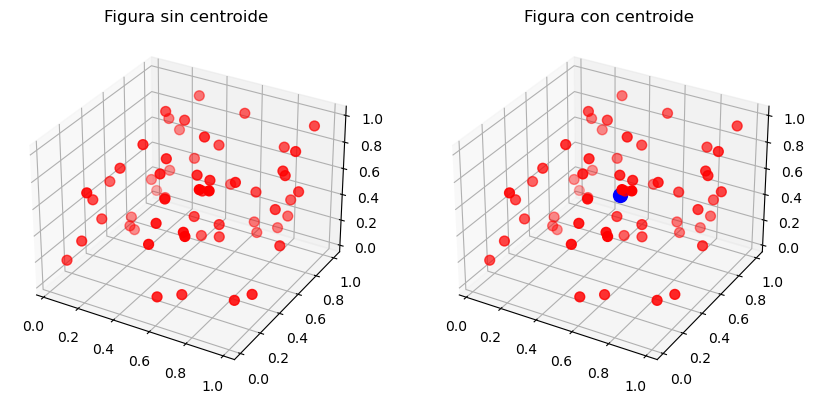

In [34]:
d3 = np.load('3D/puntos_3d.npy')
df = pd.DataFrame(d3, columns=['x', 'y', 'z'])

centroid = np.mean(d3, axis=0)

fig, ax = plt.subplots(1, 2, figsize=(10, 10), subplot_kw={'projection': '3d'})

ax[0].scatter(df['x'], df['y'], df['z'], c='red', s=50)
ax[0].set_title('Figura sin centroide')

ax[1].scatter(df['x'], df['y'], df['z'], c='red', s=50)
ax[1].set_title('Figura con centroide')
ax[1].scatter(centroid[0], centroid[1], centroid[2], c='blue', s=100)

plt.show()

Implementación y algoritmos usando set Iris

Predicciones:  [0 1 1 2 0 1 0 1 2 0 1 2 2 2 2 0 1 2 0 1 1 1 1 1 0 0 0 2 0 2]
Presición del algoritmo KNN con set de entrenamiento del 80%:  1.0


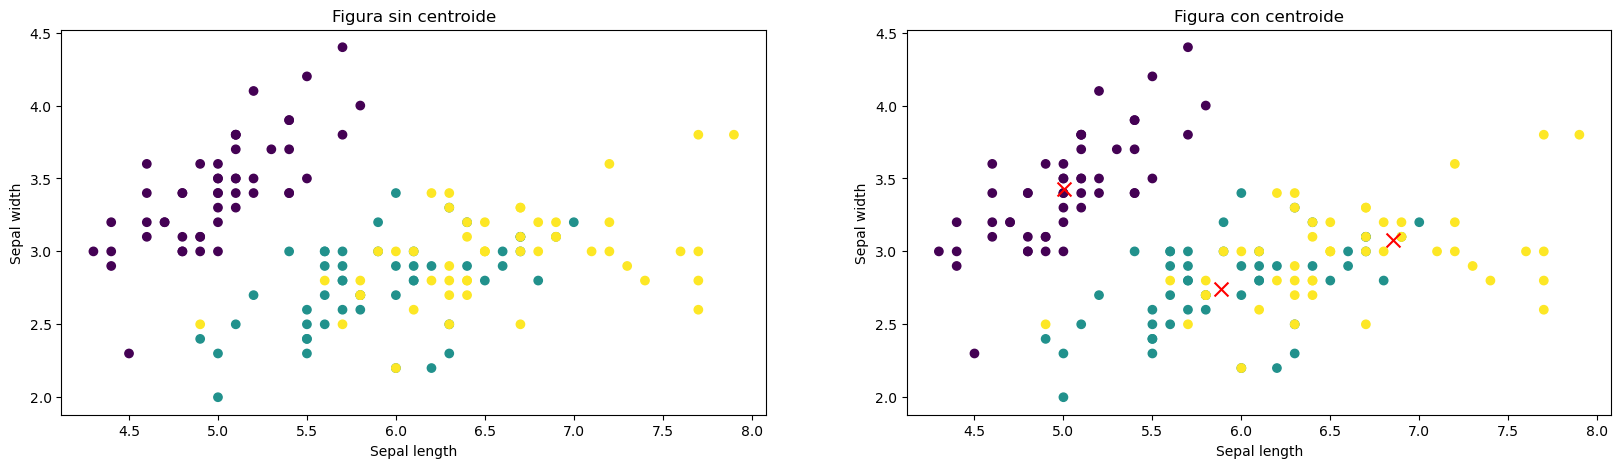

In [36]:
iris = load_iris()

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

ax[0].scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax[0].set_title('Figura sin centroide')
ax[0].set_xlabel('Sepal length')
ax[0].set_ylabel('Sepal width')

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print('Predicciones: ', y_pred)
print('Presición del algoritmo KNN con set de entrenamiento del 80%: ', accuracy)

kmeans = KMeans(n_clusters=3, n_init="auto").fit(iris.data)
centers = kmeans.cluster_centers_

ax[1].scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax[1].scatter(centers[:, 0], centers[:, 1], c="red", marker="x", s=100)
ax[1].set_title('Figura con centroide')
ax[1].set_xlabel('Sepal length')
ax[1].set_ylabel('Sepal width')

plt.show()